In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import platform
import sys

In [171]:
if platform.node() == 'DESKTOP-L2QEF9I': #Andrew's AERTC PC
    scan_file_folder_path = r"C:\Users\Andrew\Box\Chemistry Backup\LVO500\AN258-79\Cycling\AN258-79-C_100cycle.056.xlsx"
elif platform.node() == 'LAPTOP-GPVHLAR6':#Andrew's Laptop
    scan_file_folder_path = 'C:/Users/Andrew/Box/Andrew and Patrick B.-Python Project -Cycling Data Analysis/Project Scripts/VoltageProfileScript/AN258-68-5E_100cycles.073 [SAMPLE DATA].xlsx'
else:
    sys.exit('Not a whitelisted file path. Add a filepath for this computer.')

In [172]:
def main():
    data = open_file(scan_file_folder_path)
    calcdata = spec_cap(actmass,data[0,:])
    adjusted_cap_data = replace_cap(data,calcdata)    
    final_data = create_state_array2(adjusted_cap_data)
    vprof = plot_echem(final_data)
    
    return vprof

In [173]:
def user_inputs(): #More inputs to be added later
    askfile = open_file(input('Enter file name [User directory]:\n'))
    #theocap = input('Enter Theoretical Capacity:\n')
    #actmass = input('Enter Active Mass:\n')
    return askfile

In [174]:
#%% ECHEM CALCS
def spec_cap(activemass,mAmph):
    
    spec_cap = mAmph / activemass
    return spec_cap
    #print(spec_cap) 

In [175]:
#%% FILE MANAGEMENT
def open_file(filename):
    rawdata = pd.read_excel(filename, skiprows=1, usecols=['mAmp-hr','Volts','State']) #reads excel as dataframe
    #print(rawdata)
    organizer = np.array((rawdata['mAmp-hr'],rawdata['Volts'],rawdata['State'])) #organizes select columns into numpy array
    #print(organizer[0,:])   
    return organizer


def replace_cap (data, spec_cap):
    data[0,:] = spec_cap
    adjusted_cap_data = data
    return adjusted_cap_data

def create_state_array2 (spec_cap_data):
    
    #Empty lists that will be filled by for loops
    capcharlst = [] #Charge Capacity
    volcharlst = [] #Charge Voltage
    capdislst = [] #Discharge Capacity
    voldislst = [] #Discharge Voltage
    
    #Temporary lists used to appened to permanent data lists
    captemplst=[]
    voltemplst=[]
    
#Charge Loop:
    for state,i in zip(spec_cap_data[2,:],range(spec_cap_data.shape[1])):
        if state == 'C':
            captemplst.append(spec_cap_data[0][i]) #Capacity column
            voltemplst.append(spec_cap_data[1][i]) #Voltage column
        elif state != 'C':
            if len(captemplst) > 0: #filter non "C" states
                capcharlst.append(captemplst)
                volcharlst.append(voltemplst)
                captemplst=[] #Clear temperoary lists
                voltemplst=[] #
            else:
                pass
#Discharge Loop:
    for state,i in zip(spec_cap_data[2,:],range(spec_cap_data.shape[1])):
        if state == 'D':
            captemplst.append(spec_cap_data[0][i]) #Capacity column
            voltemplst.append(spec_cap_data[1][i]) #Voltage column
        elif state != 'D':
            if len(captemplst) > 0: #filter non "D" states
                capdislst.append(captemplst)
                voldislst.append(voltemplst)
                captemplst=[] #Clear temperoary lists
                voltemplst=[] #
            else:
                pass
                
            
    return [[capcharlst,volcharlst],[capdislst,voldislst]]

'''
NOTE: Possibly need this function for GUI data manipulation reasons"

def cap_retention(data):
    cycnum = len(data[0][0])
    endcaplst = []
    caps = data[0][0] #All charge cycle capacities

    for cap in caps:
        endcaplst.append(cap[-1])
    return [endcaplst,cycnum]
    
'''
    

'\nNOTE: Possibly need this function for GUI data manipulation reasons"\n\ndef cap_retention(data):\n    cycnum = len(data[0][0])\n    endcaplst = []\n    caps = data[0][0] #All charge cycle capacities\n\n    for cap in caps:\n        endcaplst.append(cap[-1])\n    return [endcaplst,cycnum]\n    \n'

In [194]:
#%% PLOTTING
def plot_echem(data):
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,5),dpi=300)
    charge = data[0]
    discharge = data[1]
    
    #Charge Plot
    for cap,vol in zip(charge[0],charge[1]):
        ax1.plot(cap,vol,'r',lw=0.6)
        
    #Discharge Plot
    for cap,vol in zip(discharge[0],discharge[1]):
        ax1.plot(cap,vol,'b',lw=0.6)
        
    ax1.set_xlabel('Specific Capacity (mAh g$^{-1}$)',fontsize=16)
    ax1.set_ylabel('Voltage (V)',fontsize=16)
    ax1.tick_params(axis='both',labelsize=14)
    ax1.margins(x=0,y=0)
    ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.25))
    
    #Capacity versus Cycle Number Plot
    cycnum = len(data[0][0])+1
    endcaplst = []
    caps = data[0][0] #All charge cycle capacities

    for cap in caps:
        endcaplst.append(cap[-1])
    ax2.plot(range(1,cycnum),endcaplst,'m.',ms=15)
    ax2.set_xlabel('Cycle Number',fontsize=16)
    ax2.set_ylabel('Specific Capacity (mAh g$^{-1}$)',fontsize=16)
    ax2.tick_params(axis='both',labelsize=14)
    ax2.margins(x=0,y=0)
    ax2.set_ylim(min(endcaplst)-100,max(endcaplst)+25)
    ax2.xaxis.set_major_locator(ticker.MultipleLocator(10))

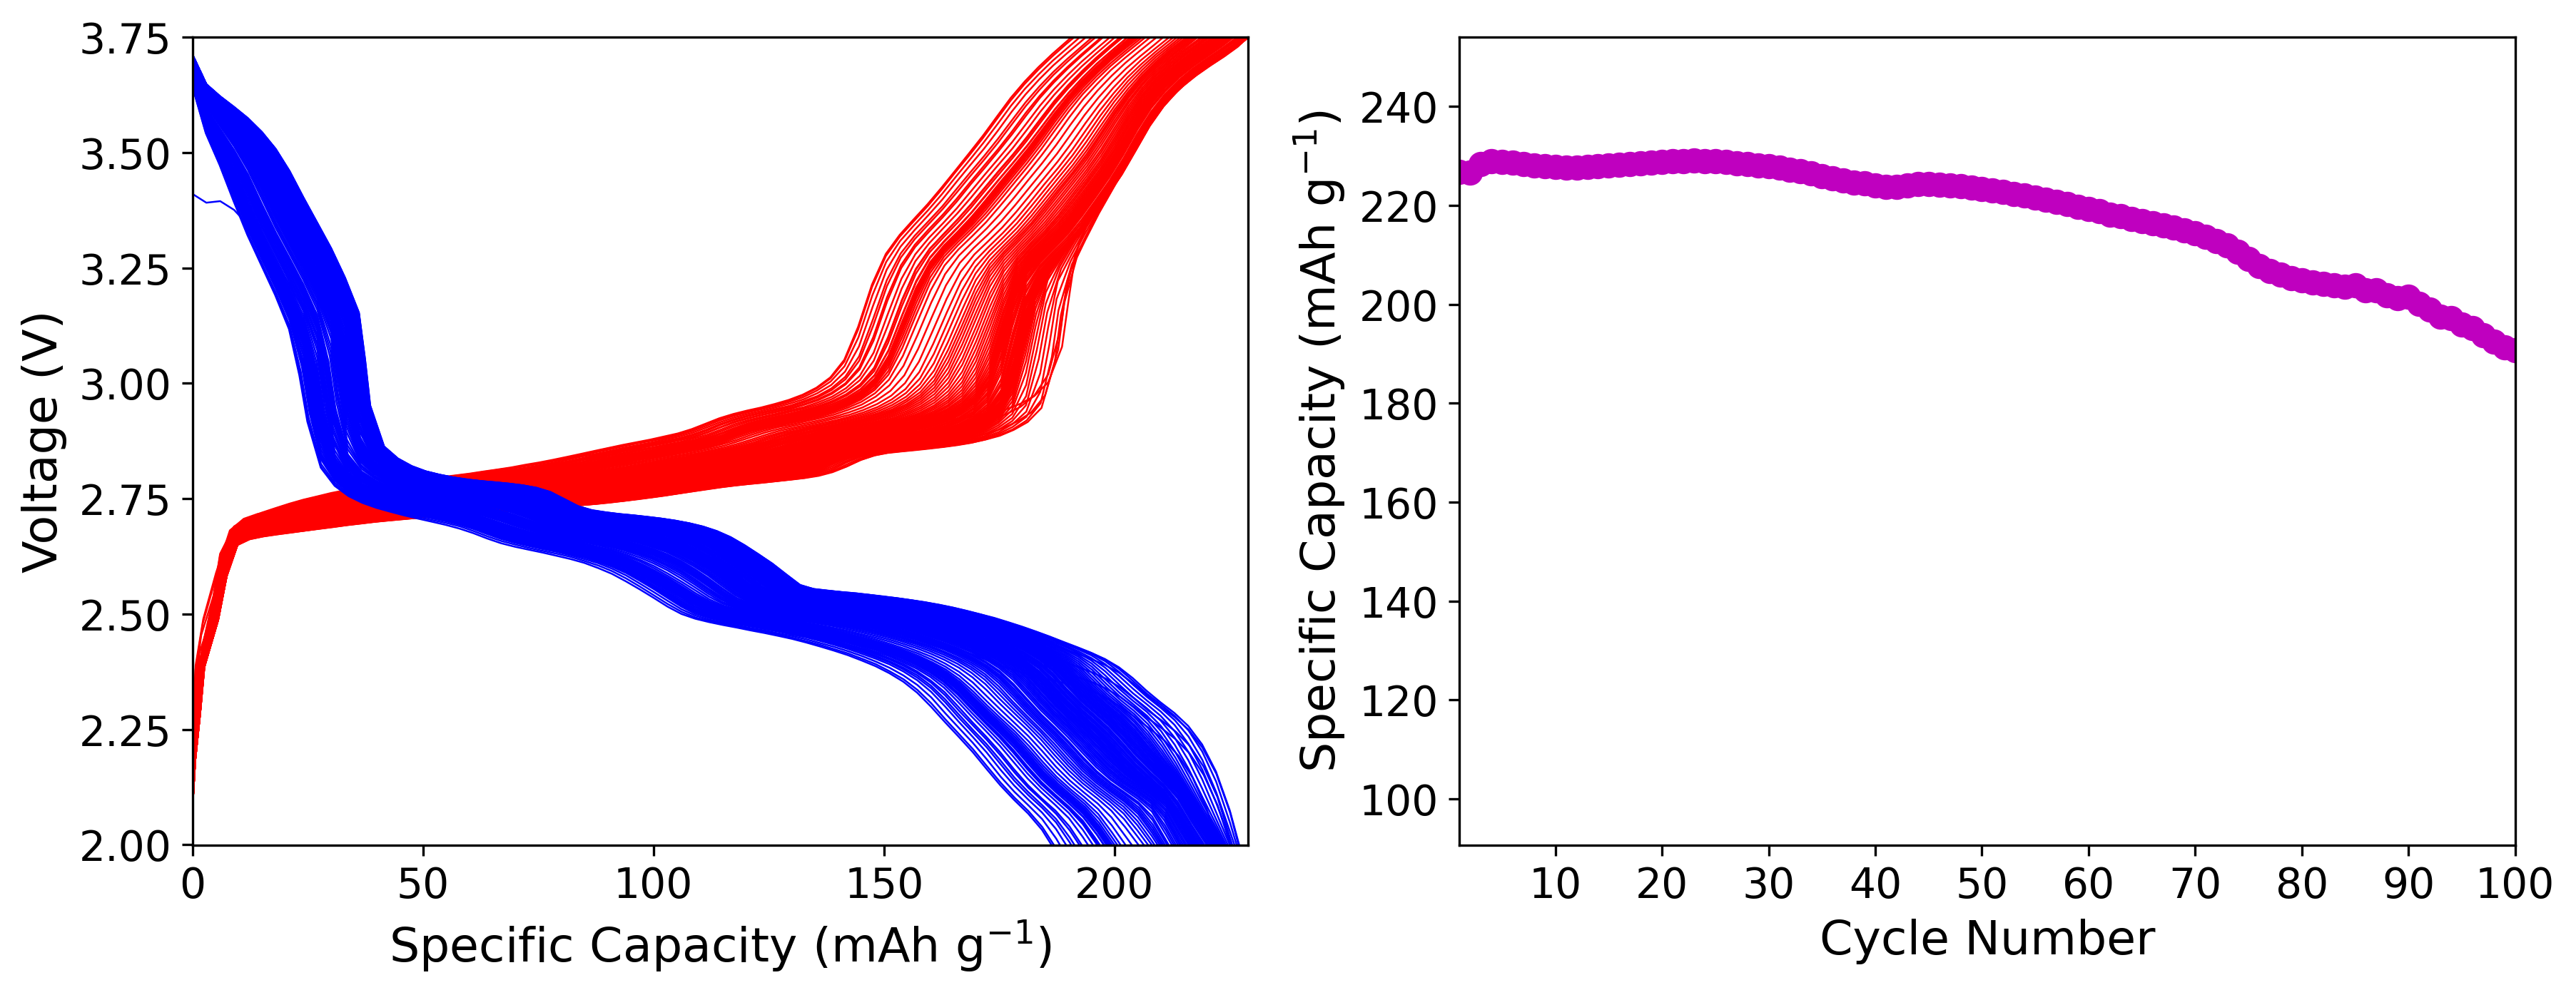

In [195]:
actmass = 0.0059
main()